In [1]:
import nltk
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
sentilexpt = open('SentiLex-lem-PT01.txt','r', encoding = 'utf-8')

In [3]:
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')
    palavra = (i[:pos_ponto])
    pol_pos = i.find('POL')
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';',' ')
    dic_palavra_polaridade[palavra] = polaridade

In [4]:
# dic_palavra_polaridade = {}
# for i in sentilexpt.readlines():
#     pos_ponto = i.find('.')
#     palavra = (i[:pos_ponto])
#     pol_pos = i.find('POL')
#     polaridade = (i[pol_pos+7:pol_pos+9]).replace(';',' ')
#     dic_palavra_polaridade[palavra] = polaridade

In [5]:
def Score_sentimento(frase):
    frase = frase.lower()
    l_sentimento = []
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))
    score = sum(l_sentimento)
    return '{}'.format(score)
    

In [6]:
def palavras_faltantes(frase):
    frase = frase.lower()
    ausentes = []
    for p in frase.split():
        if dic_palavra_polaridade.get(p, 'NaN') == 'NaN':
            ausentes.append(p)
    return ausentes

In [7]:
if dic_palavra_polaridade.get('razoável', 'NaN') == 'NaN':
    print('Não achei')
else:
    print('Achei')

Achei


Teste

In [8]:
Score_sentimento('Estou muito feliz com meu desempenho')

'1'

In [9]:
dados = pd.read_csv("Banco de dados melhorados.csv", delimiter=";")

In [10]:
ausentes = [palavras_faltantes(dados["Frase"][ind]) for ind in dados.index]

In [11]:
sentimento = [Score_sentimento(dados["Frase"][ind]) for ind in dados.index]

In [12]:
dados["Sentimento"] = sentimento

In [13]:
dados

,Frase,Polaridade,Nvpolaridade,Sentimento
0,Poderia ter sido melhor devido ao pouco tempo ...,Positivo,Neutro,0
1,Me sai bem na avaliação pois ele desenvolveu o...,Positivo,Positivo,-2
2,Foi um desenvolvimento mediano poderia ter um ...,Neutro,Neutro,-1
3,Poderia ser melhor pois não me doei o suficien...,Neutro,Neutro,1
4,Tive um desempenho razoavel na avaliação,Positivo,Neutro,0
5,O professor não mostrou uma completa dominio n...,Positivo,Negativo,2
6,De acordo com o professor eu fui bem,Positivo,Positivo,0
7,Me sinto frustrado com algumas materias por nã...,Neutro,Negativo,-1
8,Ocorreu de maneira satisfatoria,Positivo,Positivo,0
9,Aula bastante prudutiva pois foi abordado dive...,Positivo,Positivo,0


In [14]:
def polaridade_numero(pol):
    if int(pol) < 0:
        return 0
    elif int(pol) == 0:
        return 1
    else:
        return 2

In [15]:
def polaridade_texto(pol):
    if pol == 'Positivo':
        return 2
    elif pol == 'Neutro':
        return 1
    else:
        return 0.0

In [16]:
def predicao(anls):
    if anls >= 0.1:
        return 1.0
    elif (anls <= 0.1) and (anls >= -0.1):
        return 0.0
    else:
        return -1.0

In [17]:
def acuracia(anls, pred):
    if (anls + pred) == 0:
        return 1.0
    else:
        return 0.0

In [18]:
polaridade = [polaridade_texto(dados['Nvpolaridade'][ind]) for ind in dados.index]

In [19]:
dados['Nvpolaridade'] = polaridade

In [20]:
polaridade_num = [polaridade_numero(dados['Sentimento'][ind]) for ind in dados.index]

In [21]:
dados['Sentimento'] = polaridade_num

In [22]:
acuracia = [acuracia(dados['Sentimento'][ind], dados['Nvpolaridade'][ind]) for ind in dados.index]

In [23]:
acuracia = pd.DataFrame(acuracia, columns=None)

In [24]:
acuracia[0].value_counts()

0.0    43
1.0     2
Name: 0, dtype: int64

In [ ]:
acuracia[0].

In [29]:
dados

,Frase,Polaridade,Nvpolaridade,Sentimento
0,Poderia ter sido melhor devido ao pouco tempo ...,Positivo,1.0,1
1,Me sai bem na avaliação pois ele desenvolveu o...,Positivo,2.0,0
2,Foi um desenvolvimento mediano poderia ter um ...,Neutro,1.0,0
3,Poderia ser melhor pois não me doei o suficien...,Neutro,1.0,2
4,Tive um desempenho razoavel na avaliação,Positivo,1.0,1
5,O professor não mostrou uma completa dominio n...,Positivo,0.0,2
6,De acordo com o professor eu fui bem,Positivo,2.0,1
7,Me sinto frustrado com algumas materias por nã...,Neutro,0.0,0
8,Ocorreu de maneira satisfatoria,Positivo,2.0,1
9,Aula bastante prudutiva pois foi abordado dive...,Positivo,2.0,1


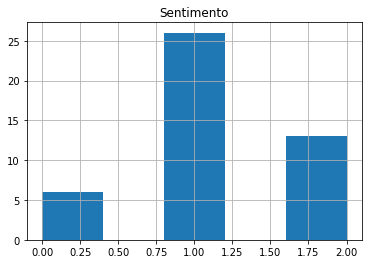

In [37]:
dados.hist(column='Sentimento', bins=5)
plt.show()